<a href="https://colab.research.google.com/github/JuanFdoGf/PracticasDS/blob/main/Perceptr%C3%B3nMulticapa_Identificaci%C3%B3nAudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Procesamiento de audio

In [1]:
# Definimos un conjunto de constantes con las rutas de las carpetas que contienen los audios de cada persona
import os

DATASET_ROOT = '/root/.cache/kagglehub/datasets/kongaevans/speaker-recognition-dataset/versions/1/16000_pcm_speeches'
BENJAMIN_DATA = os.path.join(DATASET_ROOT, 'Benjamin_Netanyau')
JENS_DATA = os.path.join(DATASET_ROOT, 'Jens_Stoltenberg')
JULIA_DATA = os.path.join(DATASET_ROOT, 'Julia_Gillard')
MARGARET_DATA = os.path.join(DATASET_ROOT, 'Margaret_Tarcher')
NELSON_DATA = os.path.join(DATASET_ROOT, 'Nelson_Mandela')

In [2]:
# Escuchamos el fichero de audio que vamos a cargar
import IPython.display as ipd

ipd.Audio(os.path.join(BENJAMIN_DATA, '22.wav'))

In [3]:
# Cargamos el audio mediante la librería librosa
import librosa

wav, sr = librosa.load(os.path.join(BENJAMIN_DATA, '22.wav'))

In [4]:
## Con la tasa de muestreo y el tamaño total de la señal se puede calcular la longitud del audio
long_audio = len(wav)/sr
print('La longitud del audio en segundos es: ', long_audio)

La longitud del audio en segundos es:  1.0


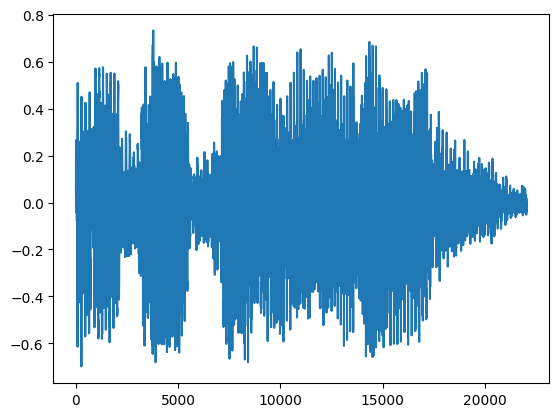

In [5]:
# Representación gráfica de la onda de sonido
from matplotlib import pyplot as plt

plt.plot(wav)
plt.show()

In [6]:
wav, sr = librosa.load(os.path.join(BENJAMIN_DATA, '22.wav'), sr=None)

In [7]:
print('Tasa de muestreo: {} Hz'.format(sr))

Tasa de muestreo: 16000 Hz


##1. Preparación del conjunto de datos

In [8]:
#Definimos una función para parsear nuestro conjunto de datos
def parse_dataset(dataset_paths):
    X = []
    y = []
    for index, dataset in enumerate(dataset_paths):
        print('[+] Parsing {} data...'.format(dataset))
        for fname in os.listdir(dataset):
            wav, sr = librosa.load(os.path.join(dataset, fname), sr=None)
            X.append(wav)
            y.append(index)
    return (X, y)

In [9]:
X, y = parse_dataset([BENJAMIN_DATA, JENS_DATA])

[+] Parsing /root/.cache/kagglehub/datasets/kongaevans/speaker-recognition-dataset/versions/1/16000_pcm_speeches/Benjamin_Netanyau data...
[+] Parsing /root/.cache/kagglehub/datasets/kongaevans/speaker-recognition-dataset/versions/1/16000_pcm_speeches/Jens_Stoltenberg data...


In [10]:
print('La longitud del conjunto de datos es: ', len(X))

La longitud del conjunto de datos es:  3000


##2. División del conjunto de datos

In [11]:
## Dividimos el conjunto de datos en entrenamiento y pruebas
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

##3. Construcción del modelo

In [12]:
# Entrenamos un perceptrón multicapa
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), solver='sgd')
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), solver='sgd')

In [13]:
# Realizamos la predicción con el conjunto de datos de prueba
y_pred = clf.predict(X_test)

In [14]:
# Mostramos el f1_score resultante de la clasificación
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='binary')

0.5294117647058824

## La representación digítal de la onda No es suficiente para que la red neuronal pueda realizar una buena clasificación; se debe de probar otra representación del sonido.